In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# -------------------------------
# 1. Load dataset
# -------------------------------
df = pd.read_csv("house_prediction_cleaned.csv")

# -------------------------------
# 2. Select Features for Clustering
# -------------------------------
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'LotArea']

# Drop rows with missing values in the selected features
df = df.dropna(subset=features)

# Extract the feature data
X = df[features]

# -------------------------------
# 3. Scale the features
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 4. Apply K-Means Clustering
# -------------------------------
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# -------------------------------
# 5. View results
# -------------------------------
print(df["Cluster"].value_counts())
print(df.groupby("Cluster")[features].mean())


Cluster
0    189
1     77
2     18
Name: count, dtype: int64
         OverallQual    GrLivArea  GarageCars  TotalBsmtSF    YearBuilt  \
Cluster                                                                   
0           6.608466  1819.158730    2.047619  1075.264550  1997.915344   
1           8.168831  2506.363636    3.025974  1423.441558  2007.025974   
2           6.833333  1794.888889    1.388889   899.222222  1936.722222   

              LotArea  
Cluster                
0         9705.433862  
1        11893.506494  
2         8828.555556  


In [12]:

# Show cluster centers
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print("=== Cluster Centers (Scaled Values) ===")
print(centroids, "\n")


=== Cluster Centers (Scaled Values) ===
   OverallQual  GrLivArea  GarageCars  TotalBsmtSF  YearBuilt   LotArea
0    -0.444889  -0.466120   -0.246167    -0.344520   0.075477 -0.309567
1     1.142523   1.267388    0.831373     1.096497   0.563757  0.950235
2    -0.216124  -0.527342   -0.971679    -1.073115  -3.204138 -0.814438 



In [13]:
# 3 PCA for 2D Visualization
# -------------------------------
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]


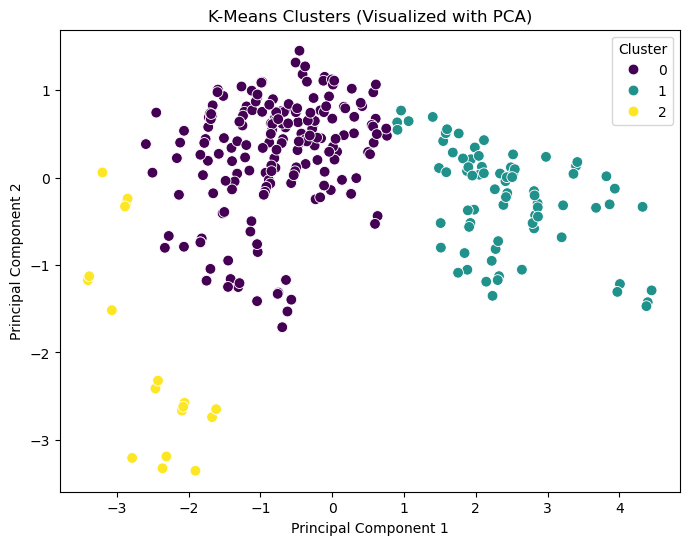

In [14]:
# 4️⃣ Plot the Clusters
# -------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df, palette="viridis", s=60)
plt.title("K-Means Clusters (Visualized with PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

In [15]:
# 5 Analyze Cluster Patterns
# -------------------------------
cluster_summary = df.groupby("Cluster")[features + ["SalePrice"]].mean().round(2)
print("=== Cluster Summary (Average Feature Values) ===")
print(cluster_summary, "\n")

=== Cluster Summary (Average Feature Values) ===
         OverallQual  GrLivArea  GarageCars  TotalBsmtSF  YearBuilt   LotArea  \
Cluster                                                                         
0               6.61    1819.16        2.05      1075.26    1997.92   9705.43   
1               8.17    2506.36        3.03      1423.44    2007.03  11893.51   
2               6.83    1794.89        1.39       899.22    1936.72   8828.56   

         SalePrice  
Cluster             
0        219066.14  
1        314902.60  
2        162622.22   



In [16]:
# Summary
# -------------------------------
print("""
Week 8 Completed
- Applied K-Means clustering (3 clusters)
- Reduced dimensions using PCA for 2D visualization
- Found feature patterns across clusters
- Ready to include unsupervised analysis in final report
""")


Week 8 Completed
- Applied K-Means clustering (3 clusters)
- Reduced dimensions using PCA for 2D visualization
- Found feature patterns across clusters
- Ready to include unsupervised analysis in final report

